# K-Means

## Notation

- $m$ - Number of training examples.
- $x^{(i)}$ - The $i^{th}$ training example.
- $K$ - Number of cluster centroids.
- $c^{(i)}$ - The index of the $k^{th}$ cluster which example $x^{(i)}$ is assigned.
- $\mu_k$ - The $k^{th}$ cluster centroid.
- $\mu_{c^{(i)}}$ - Cluster centroid to which example $x^{(i)}$ has been assigned.

## Formulas

### Cost Function

$J(c^{(1)}, ..., c^{(m)}, \mu_1, ..., \mu_k) = \frac{1}{m} \sum^{m}_{i = 1} \Vert x^{(i)} - \mu_{c^{(i)}} \Vert^2$

### Optimization Steps

1. Assign points to the closest cluster centroid.
2. Move cluster centroids to the mean location of its points.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

## K-Means Implementation

In [2]:
class KMeans:
    def __init__(self, n_clusters=5, n_iters=100):
        """
        Initialize K-Means.

        Args:
            n_clusters (int, optional): The number of clusters to search for.
            n_iters (int, optional): The number of iterations to converge.
        """
        self.n_clusters = n_clusters
        self.n_iters = n_iters

    def fit(self, X):
        """
        Repeat the optimization steps of assigning points to nearest clusters,
        and then moving clusters to the mean position of their points.

        Args:
            X (np.ndarray): Data points.

        Returns:
            self: Returns instance of self.
        """
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        for _ in range(self.n_iters):
            self.labels = self._assign_clusters(X)
            self.centroids = self._calculate_centroids(X)
        return self

    def predict(self, X):
        """
        Returns indices, where indices[i] is the cluster associated with index i.
        """
        return self._assign_clusters(X)

    def _assign_clusters(self, X):
        """
        Assign each point in X to its closest cluster.

        Args:
            X (np.ndarray): Data points.

        Returns:
            np.ndarray: NumPy array where indices[i] is the cluster associated
                        with the ith index.
        """
        indices = np.zeros(X.shape[0], dtype=int)
        for i in range(len(X)):
            indices[i] = np.argmin([np.linalg.norm(X[i] - mu) for mu in self.centroids])
        return indices

    def _calculate_centroids(self, X):
        """
        Calculate new positions of centroids.

        Args:
            X (np.ndarray): Data points.

        Returns:
            np.ndarray: The new positions of the centroids.
        """
        return np.array(
            [X[self.labels == k].mean(axis=0) for k in range(self.n_clusters)]
        )

## Basic Clustering

### Generate Clusters

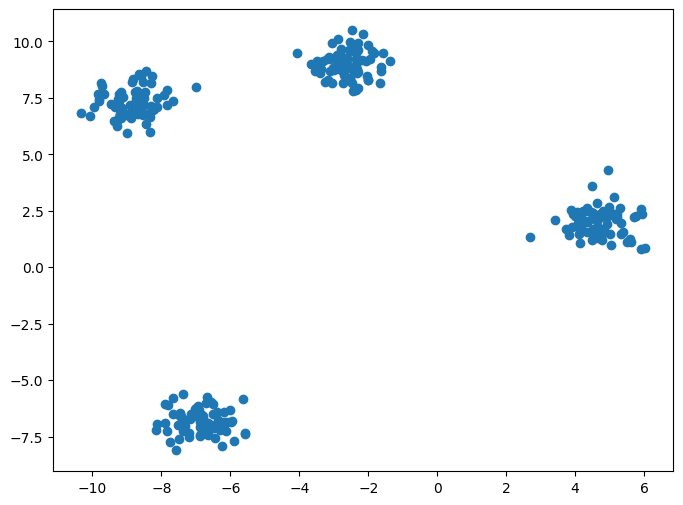

In [3]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Cluster with K-Means

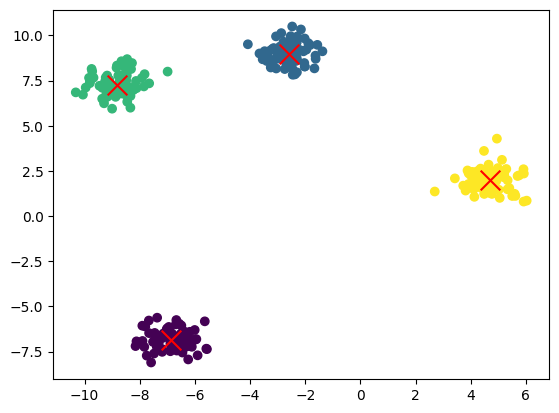

In [4]:
kmeans = KMeans(n_clusters=4, n_iters=100)
y_kmeans = kmeans.fit(X).predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap="viridis")
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c="red", marker="x")
plt.show()

## Image Compression

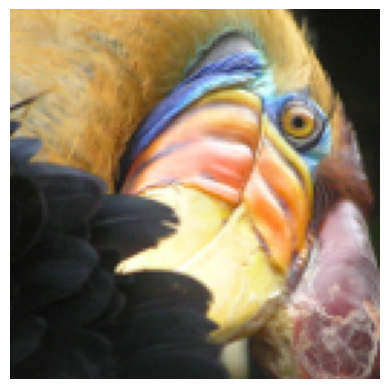

In [5]:
original_img = plt.imread("../files/image-compression.png")
plt.imshow(original_img)
plt.axis(False)
plt.show()

In [6]:
print(f"Shape of the image is: {original_img.shape}")

Shape of the image is: (128, 128, 3)


### Preprocessing Image

Reshape the image such that it has 2 dimensions - pixels and colors. Now, the image contains 128 x 128 pixels (rows), where each row contains an RGB value (columns).

In [7]:
X_img = np.reshape(
    original_img, (original_img.shape[0] * original_img.shape[1], original_img.shape[2])
)
X_img

array([[0.85882354, 0.7058824 , 0.40392157],
       [0.9019608 , 0.7254902 , 0.45490196],
       [0.8862745 , 0.7294118 , 0.43137255],
       ...,
       [0.25490198, 0.16862746, 0.15294118],
       [0.22745098, 0.14509805, 0.14901961],
       [0.20392157, 0.15294118, 0.13333334]],
      shape=(16384, 3), dtype=float32)

### K-Means of Image

By running K-Means on our image, we are finding cluster centroids for 16 colors.

In [8]:
kmeans = KMeans(n_clusters=16, n_iters=10)
pred = kmeans.fit(X_img).predict(X_img)
pred.shape

(16384,)

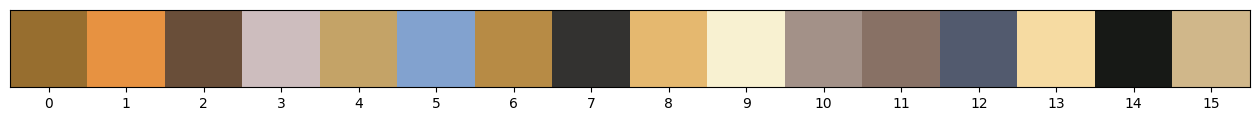

In [9]:
# Expand dimensions because we want the 3rd dimension to be RGB.
palette = np.expand_dims(kmeans.centroids, axis=0)
num = np.arange(0, len(kmeans.centroids))

plt.figure(figsize=(16, 16))
plt.xticks(num)
plt.yticks([])
plt.imshow(palette)
plt.show()

### Displaying Compressed Image

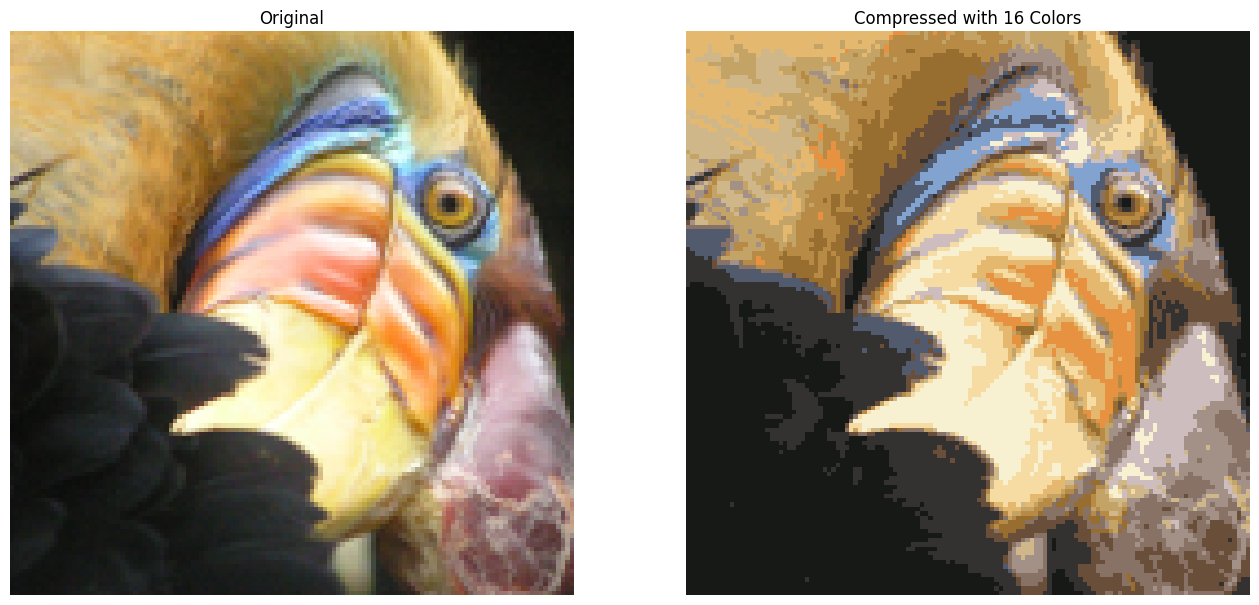

In [10]:
# Replace all pixels of the original image with the cluster associated with that pixel.
X_compressed = kmeans.centroids[pred]
X_compressed = np.reshape(X_compressed, original_img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 16))
ax[0].imshow(original_img)
ax[0].set_title("Original")
ax[0].axis(False)
ax[1].imshow(X_compressed)
ax[1].set_title("Compressed with 16 Colors")
ax[1].axis(False)
plt.show()